<div style="border:solid green 2px; padding: 20px">

<b>Привет, София! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Проект: Статистический анализ данных  #

### Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. ###

### Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться: ###
### без подписки:
#### абонентская плата отсутствует;
#### стоимость одной минуты поездки —  8рублей;
#### стоимость старта (начала поездки) — 50 рублей;

### с подпиской Ultra:
#### абонентская плата — 199 рублей в месяц;
#### стоимость одной минуты поездки — 6 рублей;
##### стоимость старта — бесплатно. ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

## Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except FileNotFoundError:
    try:
        users = pd.read_csv('users_go.csv')
    except FileNotFoundError:
        print("Файл 'users_go.csv' не найден ни в одном из указанных мест.")

try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except FileNotFoundError:
    try:
        rides = pd.read_csv('rides_go.csv')
    except FileNotFoundError:
        print("Файл 'rides_go.csv' не найден ни в одном из указанных мест.")

try:
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
except FileNotFoundError:
    try:
        subs = pd.read_csv('subscriptions_go.csv')
    except FileNotFoundError:
        print("Файл 'subscriptions_go.csv' не найден ни в одном из указанных мест.")

# Сохраняем данные в локальные копии, если они были успешно загружены
if 'users' in locals():
    users.to_csv('users_local_copy.csv', index=False)

if 'rides' in locals():
    rides.to_csv('rides_local_copy.csv', index=False)

if 'subs' in locals():
    subs.to_csv('subscriptions_local_copy.csv', index=False)


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Конечно с точки зрения правильности лучше в одном блоке `try-except` проверять одно действие, но ведь у нас либо откроются все датафреймы по одному пути, либо по другому, в связи с этим можно обойтись одним блоком 
</div>

In [3]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [5]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


## Шаг 2. Предобработка данных

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [7]:
# Создание нового столбца с номером месяца
rides['month'] = rides['date'].dt.month
rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [8]:
rides['distance'] = rides['distance'].round(2)

In [9]:
rides['duration'] = np.ceil(rides['duration']).astype('int')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что так заранее разобралась с округлением!

### Общая информация и поиск дубликатов

In [10]:
print(users.info())
print('Количество явных дубликатов в `users_go.csv` = ', users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
Количество явных дубликатов в `users_go.csv` =  31


In [11]:
duplicates = users[users.duplicated(keep=False)]
print(duplicates)

      user_id      name  age            city subscription_type
15         16    Амалия   27       Краснодар             ultra
42         43  Стефания   22            Омск             ultra
46         47      Юрий   28          Тюмень             ultra
71         72    Никита   25          Москва             ultra
107       108     Влада   29          Тюмень             ultra
...       ...       ...  ...             ...               ...
1560      829     Федор   29       Пятигорск              free
1561      809      Юрий   26            Сочи              free
1562      307    Ясмина   19       Краснодар             ultra
1563       47      Юрий   28          Тюмень             ultra
1564     1045   Артемий   28  Ростов-на-Дону              free

[62 rows x 5 columns]


In [12]:
users = users.drop_duplicates()

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [14]:
print('Количество явных дубликатов в `users_go.csv` = ', users.duplicated().sum())

Количество явных дубликатов в `users_go.csv` =  0


In [15]:
print(rides.info())
print('Количество явных дубликатов в `rides_go.csv` = ', rides.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  int32         
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 635.3 KB
None
Количество явных дубликатов в `rides_go.csv` =  0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

In [16]:
print(subs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


#### Выводы:
##### 1) В users 1565 записей, 31 явных дубликатов и 0 пропусков. Мы избавились от всех явных дубликатов.
##### 2) В rides 18067 записей, 0 явных дубликатов, 0 пропусков.
##### 3) В subs 2 записи, пропусков и явных дубликатов нет. 
##### 4) Названия столбцов в норме, соответствуют требованиям читабельности. 
##### 5) По этим данным можно проводить анализ.

## Шаг 3. Исследовательский анализ данных

### Описание и визуализация общей информации о пользователях и поездках:

#### 3.1 частота встречаемости городов;

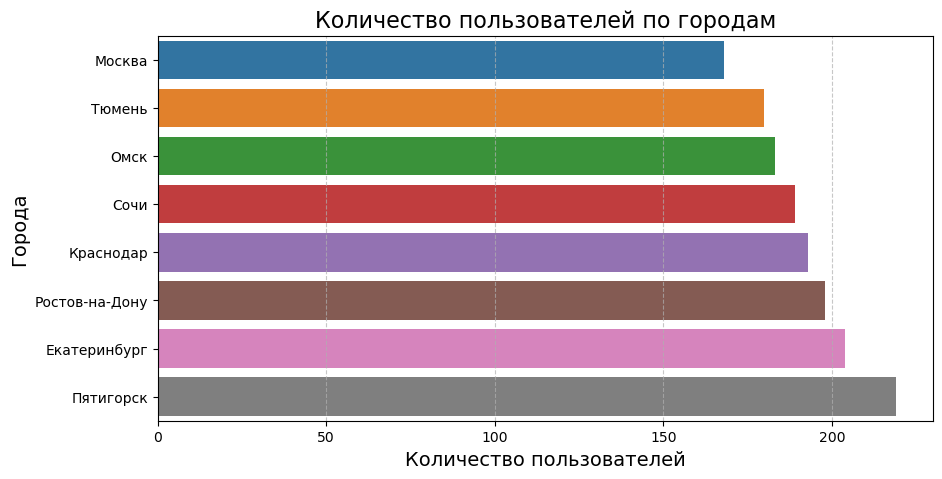

In [17]:
pivot_table = users.pivot_table(index='city', 
                                values='user_id', 
                                aggfunc='count').sort_values(by='user_id', 
                                                             ascending=True)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=pivot_table['user_id'], y=pivot_table.index)

plt.title('Количество пользователей по городам', fontsize=16)
plt.xlabel('Количество пользователей', fontsize=14)
plt.ylabel('Города', fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

In [51]:
print(users['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Здесь хотелось видеть абсолютное число пользователей по городам численно, просто вывод `value_counts`

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> С твоего позволения оставлю визуализацию, она мне очень нравится:)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
ДА, конечно, дополнительно хотел увидеть вывод числа пользователей по городам и ты добавила это

</div>

##### Первую тройку занимают Пятигорск, Екатеринбург и Ростов-на-Дону. 

#### 3.2 соотношение пользователей с подпиской и без подписки;

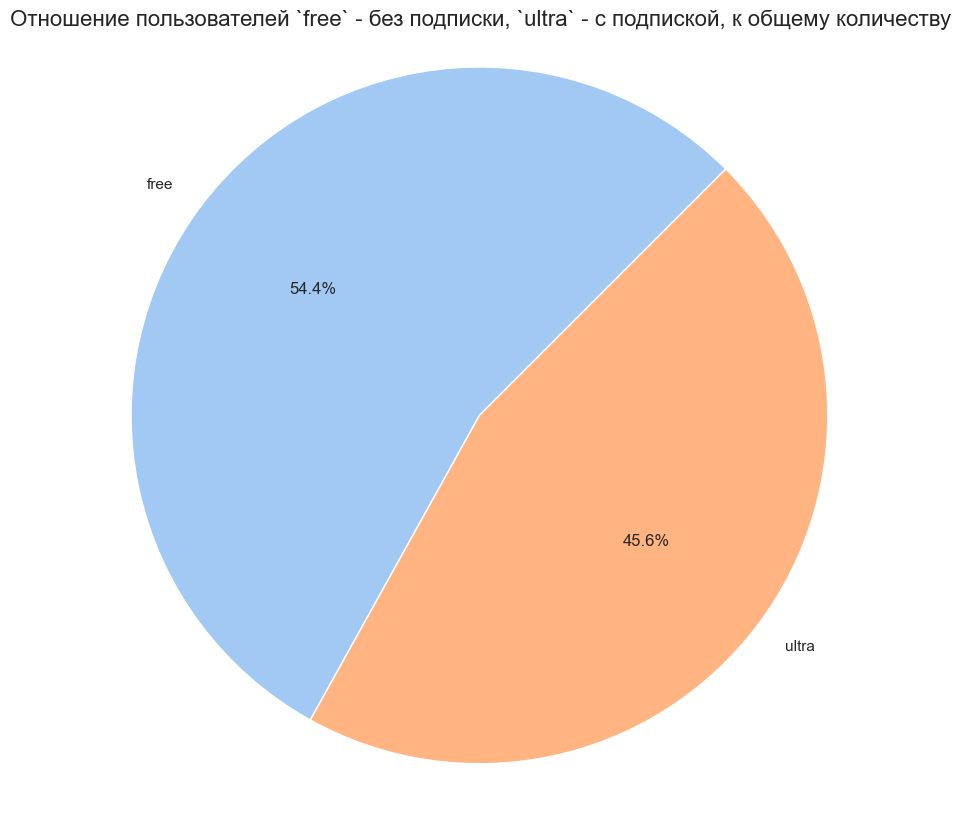

In [18]:
pivot_table = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')

sns.set(style='whitegrid')
colors = sns.color_palette("pastel")

plt.figure(figsize=(10, 10))
plt.pie(pivot_table['user_id'], labels=pivot_table.index, autopct='%1.1f%%', startangle=45, colors=colors)

plt.title('Отношение пользователей `free` - без подписки, `ultra` - с подпиской, к общему количеству', fontsize=16)

plt.axis('equal');


#### Пользователей без подписки больше на 8,8%

#### 3.3 Возраст пользователей

In [19]:
sns.set(style='whitegrid')
palette = sns.color_palette("husl")

In [20]:
pivot_table = users.pivot_table(index='age',
                                   values='user_id', 
                                   aggfunc='count').sort_values(by='age', ascending=True)

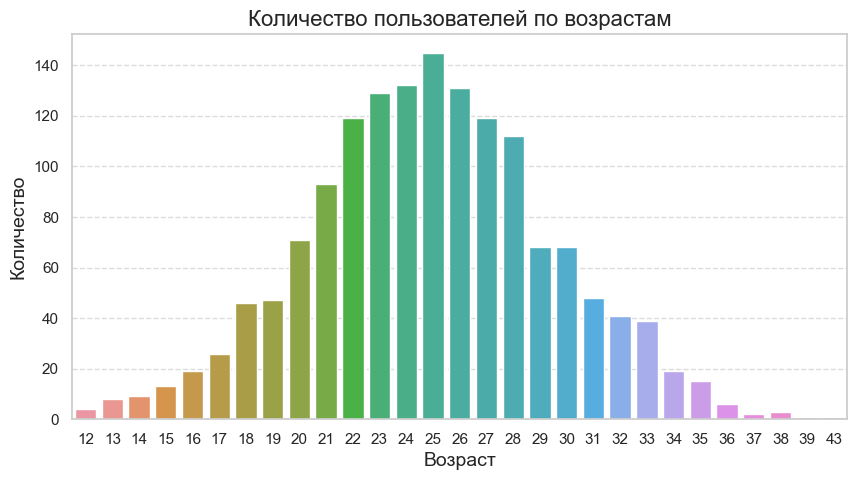

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=pivot_table.index, y=pivot_table['user_id'])

plt.title('Количество пользователей по возрастам', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А что сходится? 
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Я имела в виду, что медиана и среднее почти одинаковые, они сходятся, а это значит, что скорее всего нет выбросов. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Скорее это больше говорит о симметричности. В экстремальном случае может быть один супер большой выброс и один супер маленький и они бы скомпенсировали друг друга, тогда медиана и средние также были бы близки. (Конкретно здесь возраст довольно ограниченный по диапазону значений признак, но для других признаков это возможно) 
</div>

In [22]:
mean_age = users['age'].mean()
print(f'Средний возраст пользователей: {mean_age}')

Средний возраст пользователей: 24.903520208604956


In [23]:
age_description = users['age'].describe()
print(age_description)

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


#### Средний возраст пользователей 24,9 лет, медианный показатель - 25 лет. 

#### 3.4 расстояние, которое пользователь преодолел за одну поездку;

In [24]:
sns.set(style='whitegrid')
palette = sns.color_palette("husl")


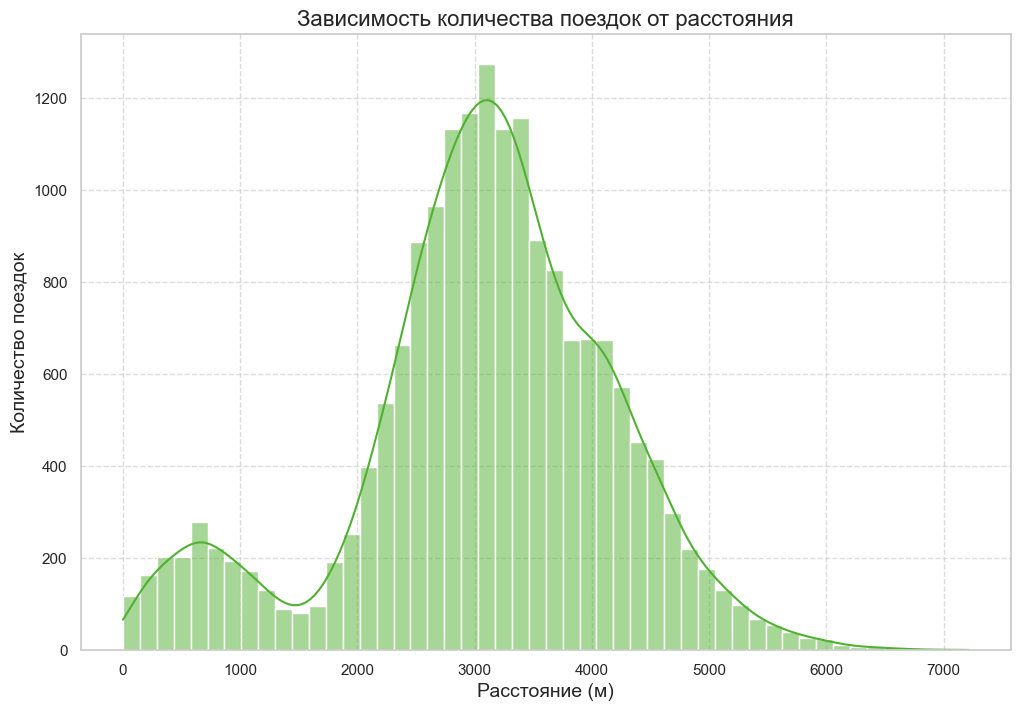

In [25]:
plt.figure(figsize=(12, 8))
sns.histplot(rides['distance'], bins=50, kde=True, color=palette[2])


plt.title('Зависимость количества поездок от расстояния', fontsize=16)
plt.xlabel('Расстояние (м)', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

In [26]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

#### Наибольшее количество поездок приходится на расстояние 3070 метром. Медиана (3133) и среднее отличаются не сильно. Также есть небольшой всплеск на расстоянии 500м. Могу выдвинуть предположение, что этот всплеск связан с тем, что есть пользователи, которые пользуются самокатом впервые, и не могут проехать много в силу непривычности. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Спасибо за гипотезу, если что-то можно проверить по данным, то лучше проверять и на основе этого уже выдвигать гипотезу, в данном случае можно посмотреть какая дистанция первых поездок, отличается ли от повторных и в таком случае гипотеза будет более ценной
    
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

#### 3.5 Продолжительность поездок.

In [27]:
sns.set(style='whitegrid')
palette = sns.color_palette("husl")

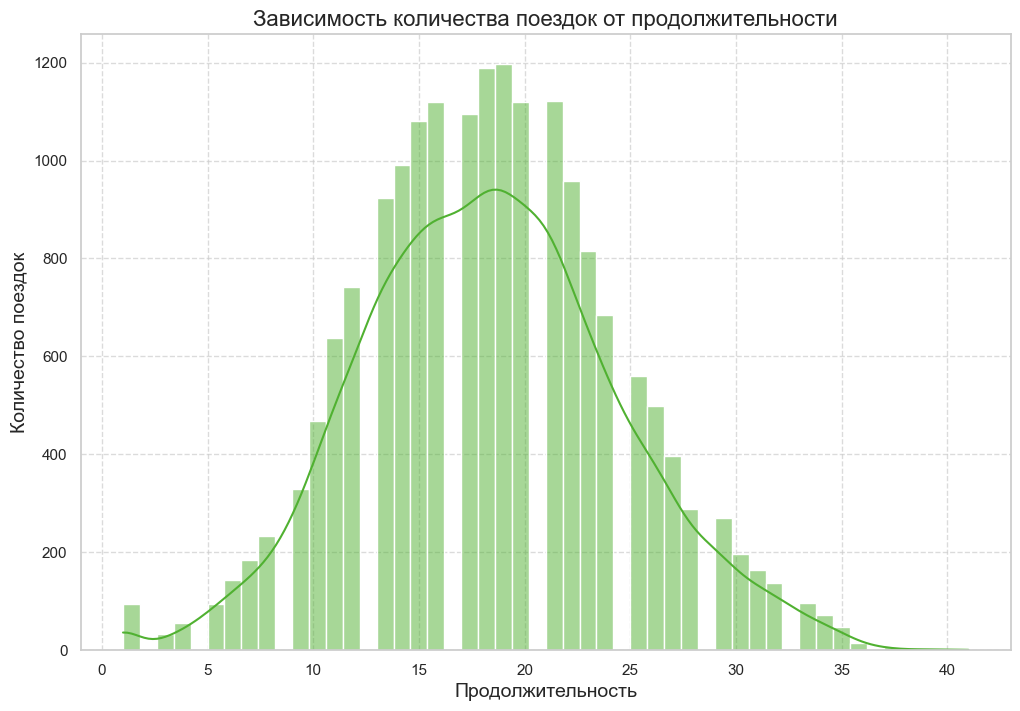

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(rides['duration'], bins=50, kde=True, color=palette[2])


plt.title('Зависимость количества поездок от продолжительности', fontsize=16)
plt.xlabel('Продолжительность', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

In [29]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

#### Медианное и среднее время совпадают (~ 18 минут). Однако есть аномальное значение  - поездки длительностью менее минуты. Пока оставим, но будем иметь в виду.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

А вот здесь красным, так как критически хочу обратить внимание на этот аспект.
    
Генерировать гипотезы, которые объясняют закономерности, аномалии - отличное стремление. Но если то, что ты предполагаешь можно проверить по имеющимся данным, то лучше сначала проверять, а потом утверждать, чтобы не подталкивать к неверным выводам.


Здесь это про расстояние крайне коротких по времени поездок
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поняла, да. Нужно больше конкретики. Спасибо за замечание! </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Если посмотреть дистанцию таких сверх коротких по времени поездок, среднее будет около 4км, что явно сигнализирует о какой-то технической беде.
    
    
Удачи в дальнейшем обучении!
</div>

### Выводы по исследовательскому анализу данных. 

#### 1) Больше всего самокатов арендуют в Пятигорске, Екатеринбурге и Ростове-на-Дону
#### 2) Количество пользователей без подписки больше на 8.8%
#### 3) Распределение среднего возраста арендаторов нормальное, среднее и  медиана ~ 25 лет.
#### 4) Наибольшее количество поездок приходится на расстояние 3070 метров. Медиана (3133 м) и среднее значение отличаются незначительно. Также наблюдается небольшой пик на расстоянии 500 метров. Это может быть связано с тем, что некоторые пользователи используют самокат впервые и не могут проехать большое расстояние из-за непривычности.
#### 5) Медианное и среднее время поездок совпадают (~18 минут). Однако есть аномалия - поездки продолжительностью менее минуты. Возможно, это связано с новыми пользователями, которые не имеют опыта езды на самокатах и поэтому проезжают короткое расстояние за небольшой промежуток времени.

### Шаг 4. Объединение данных

#### Объединение данных о пользователях, поездках и подписках в один датафрейм с помощью метода merge().

#### Общий столбец user_id используется для идентификации пользователей во всех трёх датафреймах (rides, subs, users).

In [30]:
merged_data = pd.merge(rides, users, on='user_id')

In [31]:
merged_data = pd.merge(merged_data, subs, on='subscription_type')

In [32]:
display(merged_data)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.92,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.59,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.78,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.69,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.10,20,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.42,22,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.19,19,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.31,17,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [53]:
missing_values = merged_data.isnull().sum().sum()
if missing_values == 0:
    print("Пропусков в объединенной таблице нет.")
else:
    print(f"В объединенной таблице обнаружены пропуски: {missing_values}")

# Проверяем размер таблицы
expected_rows = max(len(rides), len(users))
actual_rows = len(merged_data)
if actual_rows >= expected_rows:
    print(f"Размер объединенной таблицы соответствует ожиданиям: {actual_rows} строк.")
else:
    print(f"Размер объединенной таблицы меньше ожидаемого: {actual_rows} строк вместо {expected_rows}.")

Пропусков в объединенной таблице нет.
Размер объединенной таблицы соответствует ожиданиям: 18068 строк.


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

#### 4.2 Создаём два датафрейма из созданного на шаге 4.1:

In [33]:
users_free = merged_data[merged_data['subscription_type'] == 'free']
users_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.69,15,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.93,17,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.43,21,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.91,10,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.38,18,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [34]:
users_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [35]:
users_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [36]:
users_ultra = merged_data[merged_data['subscription_type'] == 'ultra']
users_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.92,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.59,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.78,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.69,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [37]:
users_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [38]:
users_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

#### Займемся визуализацией и сравнением. 

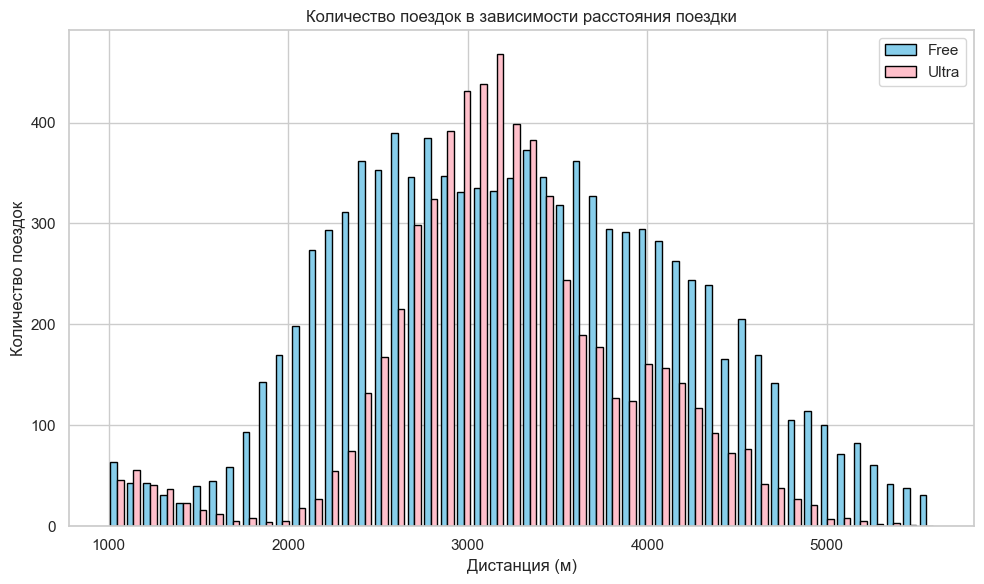

In [39]:
plt.figure(figsize=(10, 6))

plt.hist([users_free['distance'], users_ultra['distance']], bins=50, range=(1000, 5600), label=['Free', 'Ultra'], color=['skyblue', 'pink'], edgecolor='black')

# Настройки графика
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Дистанция (м)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.tight_layout()


plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отличная идея на одном графике отобразить оба тарифа, так их максимально удобно сравнивать, спасибо!
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

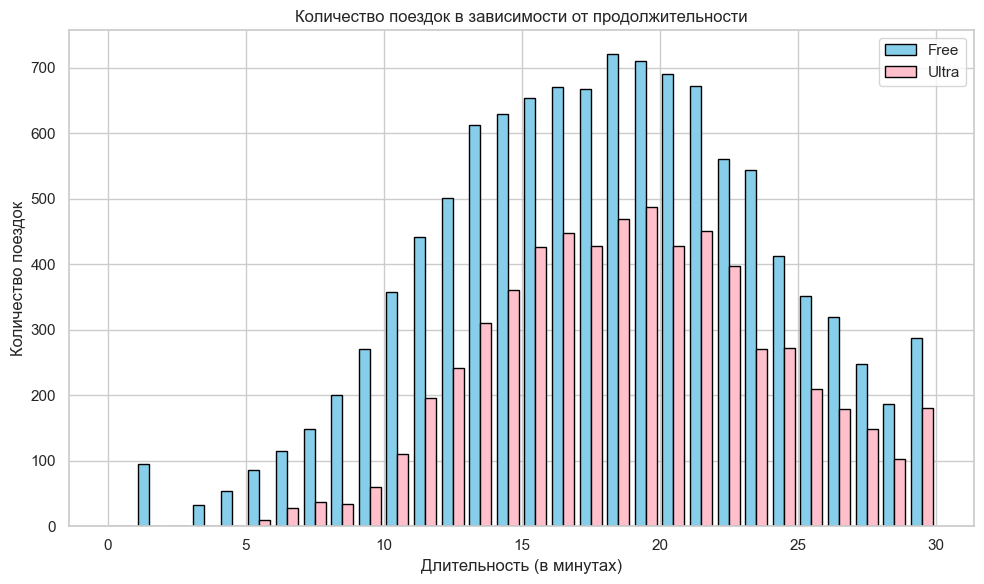

In [40]:
plt.figure(figsize=(10, 6))

plt.hist([users_free['duration'], users_ultra['duration']], bins=30, range=(0, 30), label=['Free', 'Ultra'], color=['skyblue', 'pink'], edgecolor='black')


plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.tight_layout()

plt.show()

#### Выводы:
#### 1)Описательная статистика  по пользователям без подписки  и с подпиской ultra указывает на влияние подписки на медианные значения расстояния поездок (без подписки 3114.65 метров, с подпиской 3148.64 метров). 
#### 2) Визуализация и описательная статистика по пользователям без подписки free и с подпиской ultra показывают, что подписка влияет на медианные значения времени поездок (без подписки 18 минут, с подпиской 19 минут).


## Шаг 5. Подсчёт выручки

#### 5.1 Создаем датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [41]:
aggregated_data = merged_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': ['count', 'sum']
}).reset_index()


aggregated_data.columns = ['user_id', 'month', 'total_distance', 'ride_count', 'total_duration']




In [42]:
aggregated_data['revenue'] = (merged_data['start_ride_price']*aggregated_data['ride_count'] + 
                              merged_data['minute_price']*aggregated_data['total_duration'] + 
                              merged_data['subscription_fee'])

In [43]:
aggregated_data['subscription_type'] = merged_data['subscription_type']

In [44]:
aggregated_data['total_duration'] = np.ceil(aggregated_data['total_duration']).astype(int)


In [45]:
display(aggregated_data.head())

,user_id,month,total_distance,ride_count,total_duration,revenue,subscription_type
0,1,1,7027.51,2,42,451.0,ultra
1,1,4,754.16,1,7,241.0,ultra
2,1,8,6723.47,2,46,475.0,ultra
3,1,10,5809.91,2,32,391.0,ultra
4,1,11,7003.50,3,56,535.0,ultra


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Абсолютно верный расчёт доходов, можно двигаться к проверке гипотез

### Вывод о выручке:

In [46]:
print ('Общая выручка за 2021 год:', aggregated_data['revenue'].sum(), 'руб.')

Общая выручка за 2021 год: 3982632.0 руб.


## Шаг 6. Проверка гипотез

#### Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

#### 6.1  Тратят ли пользователи с подпиской больше времени на поездки?

Н0: Средняя продолжительность поездок с подпиской и без равна. 

Н1: Средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. 

In [47]:
hypothesis = st.ttest_ind(users_ultra['duration'], 
                       users_free['duration'], equal_var=True,
                       alternative='greater')

print("p-value:", hypothesis.pvalue)

alpha = 0.05


if hypothesis.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

#### Вывод: отвергаем нулевую гипотезу, а это значит, что есть вероятность, что  средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при alpha = 0,05 (5%).

#### 6.2 среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает  3130 метров? 

Н0: Среднее расстояние поездок с подпиской равно 3130 метров.

Н1: Среднее расстояние поездок с подпиской больше оптимального в 3130 метров.

In [48]:
normal_distance = 3130
alpha = 0.05

hypothesis_2 = st.ttest_1samp(
    users_ultra['distance'],  normal_distance, alternative='greater')

print(hypothesis_2.pvalue)

if hypothesis_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние превышает 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние не превышает 3130 метров')

0.9195362605842414
Не получилось отвергнуть нулевую гипотезу: среднее расстояние не превышает 3130 метров


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Бизнес может спать спокойно, с износом всё в порядке

#### Вывод: Нулевую гипотезу не удалось отвергнуть, следовательно, можно утверждать, что при уровне значимости 5% среднее расстояние поездки пользователей с подпиской не превышает оптимальные 3130 метров с точки зрения износа самоката.

#### 6.3 Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.

Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

In [49]:
ultra_use_mnth = aggregated_data.loc[aggregated_data.subscription_type == 'ultra', 'revenue'] 

free_use_mnth = aggregated_data.loc[aggregated_data.subscription_type == 'free', 'revenue'] 


hypothesis_3 = st.ttest_ind(ultra_use_mnth, 
                       free_use_mnth,
                       alternative = 'greater')

alpha = .05

print(hypothesis_3.pvalue)

if hypothesis_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.318341752391833e-51
Отвергаем нулевую гипотезу


#### Вывод: выручка с пользователей с подпиской больше выручки пользователей без подписки.

####  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Потребуется парный t-тест,если данные о количестве обращений до и после обновления серверов представляют собой парные наблюдения для каждого пользователя. Будем использовать scipy.stats.ttest_rel.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
А как будет звучать альтернативная гипотеза? 

## Общие выводы по анализу

##  1) Географическое распределение популярности сервиса:

#### Наибольшее количество аренд самокатов наблюдается в Пятигорске, Екатеринбурге и Ростове-на-Дону. Это может указывать на высокий спрос и потенциал для дальнейшего развития сервиса в этих городах.

##  2) Профиль пользователей:

#### Количество пользователей без подписки превышает количество пользователей с подпиской на 8.8%.

#### Средний возраст пользователей составляет примерно 25 лет, что говорит о популярности сервиса среди молодежи.

##  3) Анализ поездок:

#### Наибольшее количество поездок приходится на расстояние 3070 метров, что подтверждается как медианным (3133 м), так и средним значением.

#### Время поездок в среднем составляет около 18 минут, также присутствуют случаи очень коротких поездок.

##  4) Влияние подписки на поведение пользователей:

#### Пользователи с подпиской Ultra в среднем проезжают чуть большее расстояние (медиана 3148.64 метров) по сравнению с пользователями без подписки (медиана 3114.65 метров).

#### Время поездок также увеличивается с подпиской (медиана 19 минут против 18 минут без подписки).

##  5) Финансовые показатели:

#### Общая выручка за 2021 год составила 3,982,632 рубля.

#### Выручка с пользователей с подпиской больше выручки пользователей без подписки.

##  6) Средняя продолжительность поездок:

#### Нулевая гипотеза о том, что средняя продолжительность поездок с подпиской не превышает продолжительность поездок без подписки, была отвергнута при уровне значимости 5%. Это указывает на то, что подписка действительно способствует увеличению продолжительности поездок.

##  7) Среднее расстояние поездок:

#### Нулевая гипотеза о том, что среднее расстояние поездки пользователей с подпиской не превышает оптимальные 3130 метров, не была отвергнута. Это свидетельствует о том, что подписка не приводит к значительному увеличению среднего расстояния поездок, что является позитивным с точки зрения износа самокатов.

##  8) Рекомендации

#### Фокус на подписки: усилить маркетинг и акции, направленные на продвижение подписки Ultra, так как она увеличивает продолжительность поездок и общую выручку.

#### Анализ городов: продолжить анализ востребованности сервиса в различных городах и, при необходимости, расширять парк самокатов в самых популярных регионах.



